<a href="https://colab.research.google.com/github/AndersonBarbosa10/projetos_data_science/blob/main/Analisando_os_Dados_do_Airbnd_(Nova_York).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - *Nova York*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**, e um detalhe importante é que ele não possui nenhum hotel!

Ela fornece uma plataforma de aluguel de hospedagens inovadora, que permite que qualquer pessoa disponibilize ou reserve acomodações ao redor do mundo.Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática. 

A pessoa que pretende viajar pequisa a estadia na cidade e período desejado, podendo filtrar com base em vários requisitos, como tipo de acomodação (casa, apartamento, quarto), avaliações, capacidade, localização, se permite ou não animais de estimação, se tem estacionamento, por exemplo.

O Airbnb tem regras específicas para garantir a segurança de todas as partes, buscando minimizar eventuais problemas e frustrações dos usuários. A plataforma conta, por exemplo, com um sistema de avaliação próprio e um sistema de atendimento ao consumidor, permitindo que um anfitrião rejeite o pedido de alguma hospedagem, sem dar maiores explicações.

Uma das iniciativas do Airbnb bem interessante é disponibilizar dados do site, para algumas das principais cidades do mundo. É possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*, por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

Neste *notebook*, iremos analisar os dados referentes à cidade Nova York, a cidade mais populosa do Estados Unidos, e ver quais insights podem ser extraídos a partir de dados brutos.

## Obtenção dos Dados

Os dados utilizados neste *notebook* foram obtidos por meio do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para análise exploratório foi baixado apenas o arquivo `listings.csv`- *Summary information and metrics for listings in Nova York (good for visualisations).*

In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2021-04-07/visualisations/listings.csv")

## Análise dos Dados

Esta etapa tem por objetivo permitir o entendimento e conhecimento geral de como os dados estão estruturados.

Importante, antes de iniciar qualquer análise, verificar a cara do nosso dataset, analisando as 5 primeiras entradas e as 5 últimas entradas.


In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,2019-11-04,0.35,3,365
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Bedford-Stuyvesant,40.68494,-73.95765,Entire home/apt,76,1,396,2021-03-19,4.98,1,198
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.35,1,365
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,175,7,1,2014-01-02,0.01,1,79
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,79,2,474,2020-09-25,3.26,1,355


In [ ]:
# mostrar as 5 últimas entradas
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
36900,49088566,Amenity-loaded Single Room in UWS,334376746,Sharedeasy,Manhattan,Upper West Side,40.79949,-73.96118,Private room,46,30,0,NaN,NaN,3,365
36901,49089512,Unfurnished 2BR Apartment in Upper East Side,305240193,June,Manhattan,Upper East Side,40.78041,-73.94575,Entire home/apt,98,30,0,NaN,NaN,241,364
36902,49089765,Beautiful Renovated Sunny Jr. One Bed,387269117,Tal,Manhattan,East Village,40.72511,-73.98222,Entire home/apt,145,30,0,NaN,NaN,3,300
36903,49091581,Furnished Bright Apartment in Hell's Kitchen,305240193,June,Manhattan,Hell's Kitchen,40.76456,-73.98573,Entire home/apt,123,30,0,NaN,NaN,241,312
36904,49092532,Panoramic city views! 2/3 bdrms private terra...,154949847,Emily,Manhattan,Hell's Kitchen,40.77034,-73.99305,Entire home/apt,299,30,0,NaN,NaN,10,175


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Prosseguindo com as análises iniciais vamos verificar a quantidade de entradas que nosso conjunto de dados possui e ver quais os tipos de cada coluna.



In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar os tipos das variáveis
display(df.dtypes)

Entradas:	 36905
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Há valores ausentes no *dataset*? Qual a porcentagem?**

Considerando que a qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. Precisamos entender logo no início se os valores nulos são significativos ou não comparados ao total de entradas.

Podemos perceber que as variáveis reviews_per_month e last_review possuem valores nulos em mais de 25% das linhas.
As variáveis host_name e name possui aproximadamente 0,3% e 0,03% dos valores nulos, respectivamente.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.263379
last_review                       0.263379
host_name                         0.034358
name                              0.000352
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Plotamos o histograma com o objetivo de identificar a distribuição das variáveis.

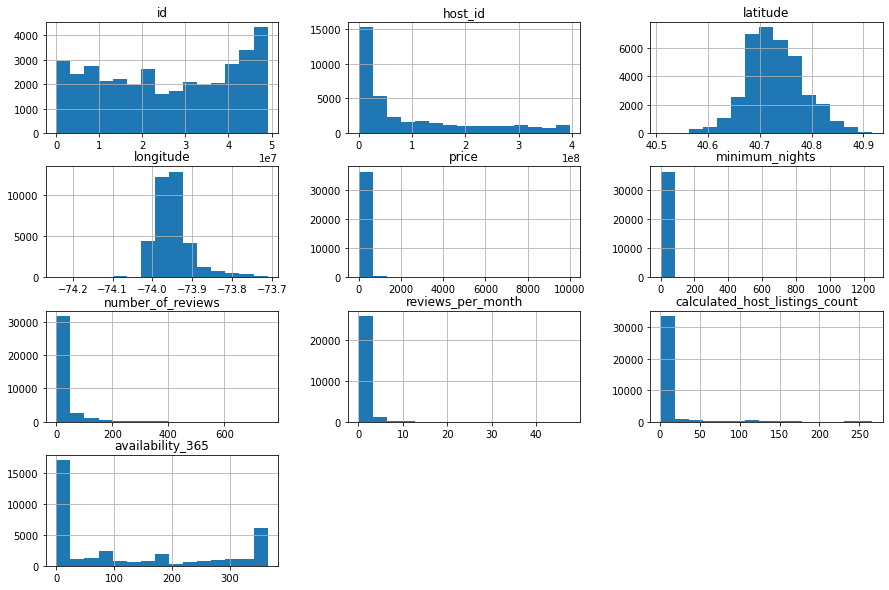

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Há outliers presentes?**

A partir da distribuição do histograma, é possível observar indícios da presença de outliers, como por exemplo nas variáveis price, minimum_nights e calculated_host_listings_count, number_of_reviews.

Os valores não seguem uma distruição, distocendo toda a representação gráfica. Para atestar, há duas maneiras rápidas que auxiliam a detecção de outliers, sendo:

* Resumo estatístico por meio do método describe()
* Plotar boxplots para a variável.

Vamos focar nossa análise nas variáves `price` e `minimum_nights`.

In [ ]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights']].describe()

,price,minimum_nights
count,36905.000000,36905.000000
mean,148.559274,23.123235
std,290.379973,26.546473
min,0.000000,1.000000
25%,61.000000,4.000000
50%,100.000000,30.000000
75%,160.000000,30.000000
max,10000.000000,1250.000000


Observando o resumo estatístico acima, constatamos que:

* A variável `price` possui 75% do valor abaixo de 160, porém seu valor máximo é 10000.
* A variável `minimum_nights` possui quantidade mínima de noites acima de 365 dias no ano, porém 75% está abaixo de 30 dias.

#### Plotando o Boxplot para minimum_nights

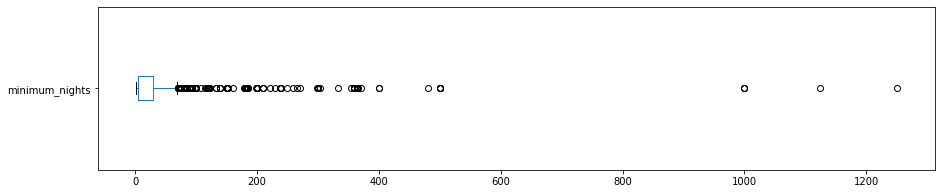

Valores acima de 30 dias para mininum_nights
1329 entradas
3.6011%


In [ ]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("Valores acima de 30 dias para mininum_nights")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Plotando o Boxplot para minimum_nights

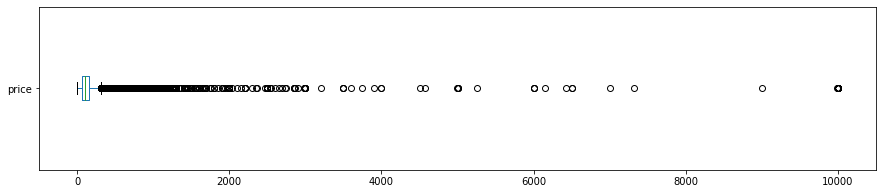


price: valores acima de 1500
120 entradas
0.3252%


In [ ]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

#### Histogramas sem *outliers*

Considerando que foi identificado *outliers* nas variáveis `price` e `minimum_nights`, vamos limpar o *DataFrame* e plotar novamente o histograma.

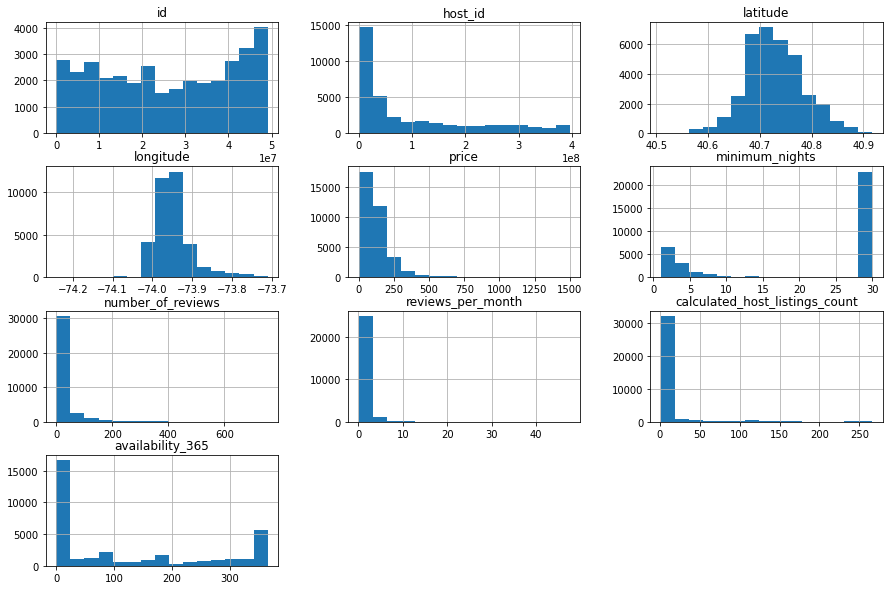

In [ ]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis = 0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis = 0, inplace=True)

# plotar o histograma
df_clean.hist(bins=15, figsize=(15,10));


### **Q5. Qual a média dos preços de aluguel?**

Agora vamos descobrir qual o preço médio de aluguel.

In [ ]:
# ver a média da coluna `price``
df_clean['price'].mean()

136.61201014942205

### **Q6. Qual a correlação existente entre as variáveis**

O próximo passo é verificar a correlação entre as variáveis. Importante atentarmos que quando falamos de correlação, significa que uma variável ter correlação com a outra não implica que uma cause a outra.

Por meio da função `corr` do Pandas é possível obter os coeficientes de correlação de todas as variávies e ultilizamos esses valores para criar um *heatmap*, que mapeia os valores de uma matriz com cores, com a biblioteca Seaborn, facilitando a identificação de variáveis correlacionadas.

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.032725,-0.046956,-0.039917,-0.011534,0.061577
minimum_nights,-0.032725,1.000000,-0.255475,-0.396818,0.130057,-0.143069
number_of_reviews,-0.046956,-0.255475,1.000000,0.666955,-0.105881,0.145114
reviews_per_month,-0.039917,-0.396818,0.666955,1.000000,-0.010164,0.196380
calculated_host_listings_count,-0.011534,0.130057,-0.105881,-0.010164,1.000000,0.211376
availability_365,0.061577,-0.143069,0.145114,0.196380,0.211376,1.000000


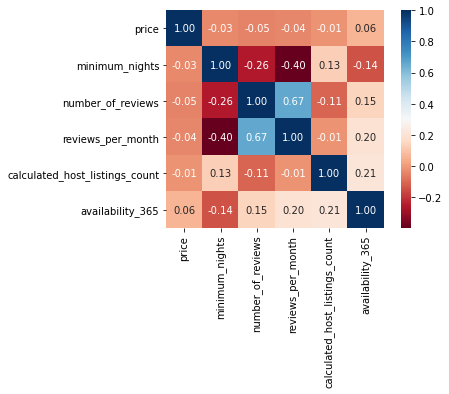

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**

A variável `room_type` aponta o tipo de locação anunciada no Airbnb. Há opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Com o método `value_counts()`, vamos contar a quantidade de ocorrências de cada tipo de aluguel.

Percebemos que quase 50% do aluguéis no Estado de Nova York se referem ao apartamentos/casas inteiras.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    18355
Private room       16198
Shared room          636
Hotel room           281
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df.shape[0]

Entire home/apt    0.497358
Private room       0.438911
Shared room        0.017233
Hotel room         0.007614
Name: room_type, dtype: float64

### **Q8. Qual a localidade mais cara do dataset?**

Vamos usar o  `groupby()` para comparar os bairros (*neighbourhoods*) que possui a maior média de preço.

In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Fort Wadsworth       800.000000
Tribeca              371.298780
Tottenville          329.000000
Willowbrook          309.000000
Prince's Bay         290.000000
SoHo                 266.189189
Flatiron District    253.650794
Arverne              243.114286
Theater District     238.947552
DUMBO                232.769231
Name: price, dtype: float64

Percebemos, acima, que o bairro de *Fort Wadsworth* está com o preço muito acima da média, o que chama bastante nossa atenção.

Ao verificar a quantidade de imóveis em *Fort Wadsworth* observamos que há apenas um dado no nosso dataset, ou seja, precisamos analisar mais afundo para obtermos a confirmação se o dado representa ou não a realidade ou se pode ser algum tipo de *outlier*.

Em comporação com os dados de *Tribeca*, por exemplo, observamos que há 164 entradas no nosso dataset, demonstrando ser uma informação mais confiável para nossa análise.

In [ ]:
# ver quantidade de imóveis em Fort Wadsworth
print(df_clean[df_clean.neighbourhood == 'Fort Wadsworth'].shape)

df_clean[df_clean.neighbourhood == 'Fort Wadsworth']

(1, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
14882,20305160,Beach House Retreat. 15 minutes from Manhattan.,1715301,Mark,Staten Island,Fort Wadsworth,40.59324,-74.0608,Entire home/apt,800,30,0,NaN,NaN,6,365


In [ ]:
# ver quantidade de imóveis em Tribeca
print(df_clean[df_clean.neighbourhood == 'Tribeca'].shape)

df_clean[df_clean.neighbourhood == 'Tribeca']

(164, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
104,43726,"Apartment in Tribeca, NYC Panoramic VIEWS~",191091,Ev,Manhattan,Tribeca,40.72100,-74.00971,Entire home/apt,250,30,13,2020-12-29,0.73,1,155
143,60164,"Beautiful, elegant 3 bed SOHO loft",289653,Harrison,Manhattan,Tribeca,40.72012,-74.00397,Entire home/apt,500,30,106,2020-01-02,0.91,1,0
714,471758,TriBeCa Amazing River View Loft 3BR,2339722,Francesca,Manhattan,Tribeca,40.72254,-74.01074,Entire home/apt,500,30,3,2018-06-19,0.04,1,0
740,494937,"The SoHo Loft - Huge Penthouse - 1,200 sqft",1527535,Jean-Marie,Manhattan,Tribeca,40.71993,-74.00502,Entire home/apt,535,1,116,2021-04-11,1.11,1,80
857,591565,Everyone who stays leaves happy!,2919467,Lisa,Manhattan,Tribeca,40.71493,-74.00698,Private room,229,30,62,2014-04-27,0.59,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34400,47283146,The TriBeCa LOFT #4 ; Church st. Perfect locat...,86771798,Daia,Manhattan,Tribeca,40.71787,-74.00370,Entire home/apt,249,30,1,2021-02-05,0.47,18,169
34792,47713016,Tribeca Room - Laundry - Gym,268555779,Joanne,Manhattan,Tribeca,40.71881,-74.01187,Private room,70,7,0,NaN,NaN,1,0
35406,48117790,Tribeca Designer Loft,42636558,Carmen,Manhattan,Tribeca,40.71537,-74.00724,Entire home/apt,800,10,0,NaN,NaN,1,76
35626,48242253,Stunning Two Bedroom in Tribeca,22541573,Ken,Manhattan,Tribeca,40.71691,-74.00553,Entire home/apt,379,30,0,NaN,NaN,92,359


A partir dos dados de Latitudes e Longitudes fornecidos no nosso *DataFrame* é possível plotar um ponto para cada observação, utilizando as variávies `x=longitude` e `y=latitude`.

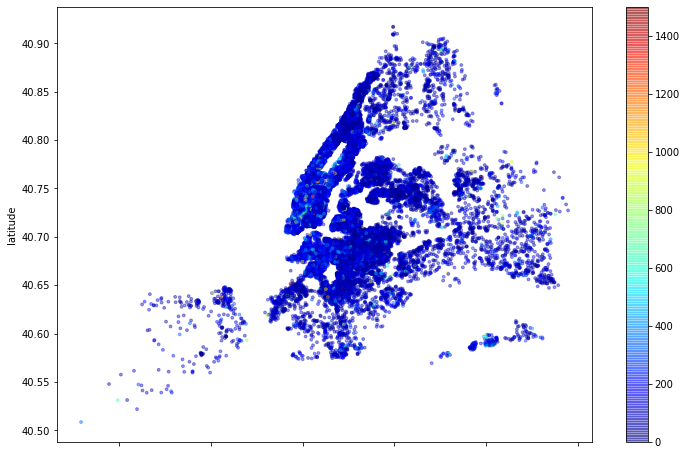

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q9. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

Por último vamos descobrir a quantidade média de noites mínimas por locação.

In [ ]:
# ver a média da coluna `minimum_nights``
df_clean['minimum_nights'].mean()

20.68982238511418

## Conclusões


O artigo buscou demonstrar uma análise resumida da base de dados do Airbnb, possibilitando que você tenha um conhecimento superficial sobre os aluguéis de imóveis do Airbnb no Estado de Nova York.

Procuramos demonstrar também um pouco do potencial da linguagem Python na análise exploratória de dados. Importante deixar claro que há diversas formas de extrair e análisar os dados, cabe a você decidir quais as melhores técnicas a serem usadas.


